In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(style="darkgrid")

In [4]:
df = pd.read_csv('./amazon_sales_clean_final.csv')

In [5]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,Easy Ship
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,Easy Ship


In [7]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Display basic information about the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128941 entries, 0 to 128940
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128941 non-null  int64         
 1   Order ID            128941 non-null  object        
 2   Date                128941 non-null  datetime64[ns]
 3   Status              128941 non-null  object        
 4   Fulfilment          128941 non-null  object        
 5   Sales Channel       128941 non-null  object        
 6   ship-service-level  128941 non-null  object        
 7   Category            128941 non-null  object        
 8   Size                128941 non-null  object        
 9   Courier Status      128941 non-null  object        
 10  Qty                 128941 non-null  int64         
 11  currency            128941 non-null  object        
 12  Amount              128941 non-null  float64       
 13  ship-city           128941 no

Total Sales: INR 78570548.25


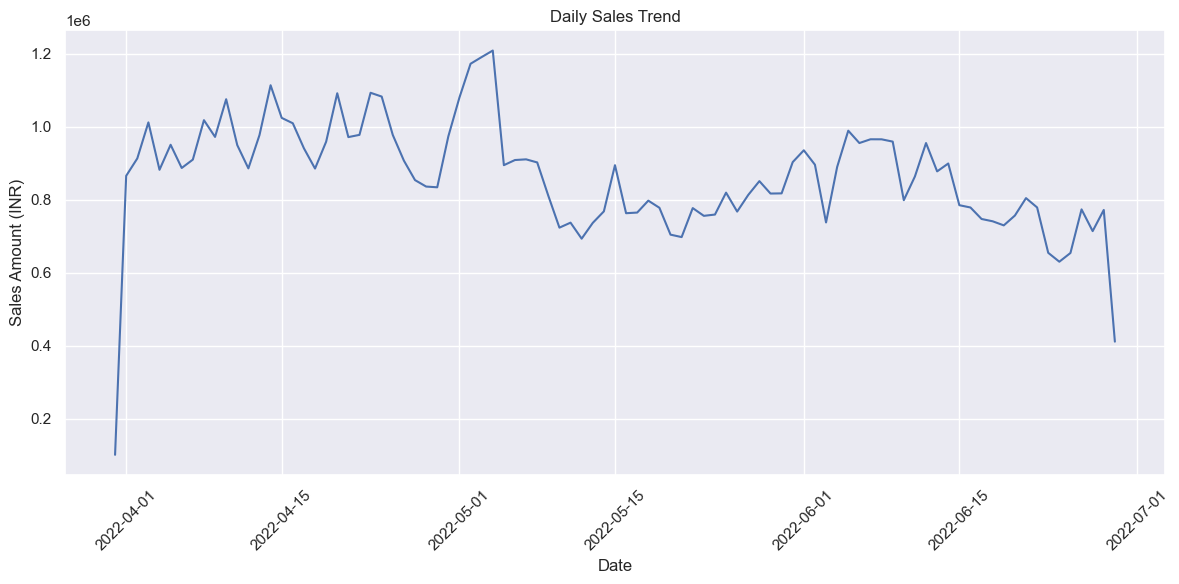

In [8]:
# Calculate total sales
total_sales = df['Amount'].sum()
print(f"Total Sales: INR {total_sales:.2f}")

# Plot daily sales trend
daily_sales = df.groupby('Date')['Amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Amount'])
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales Amount (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

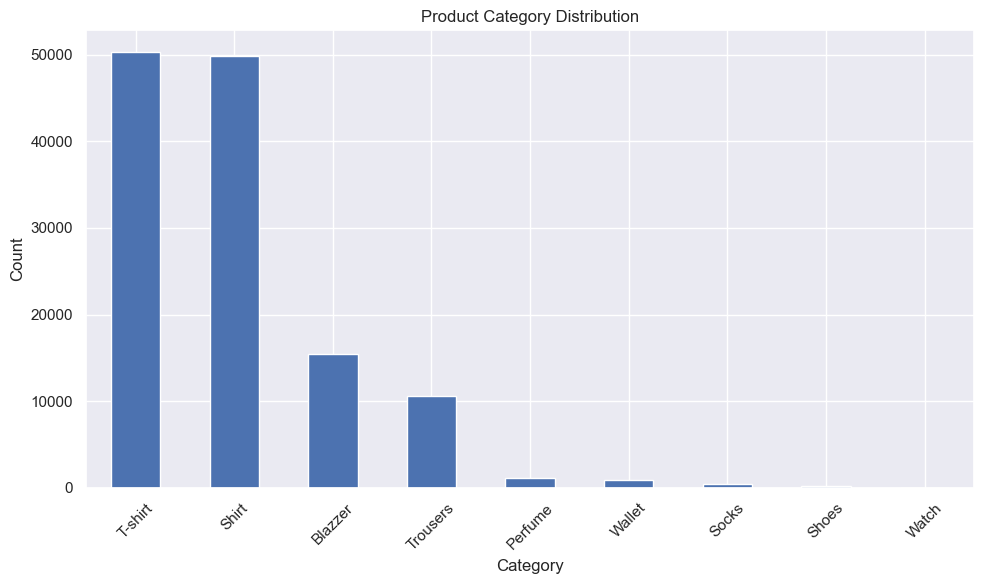

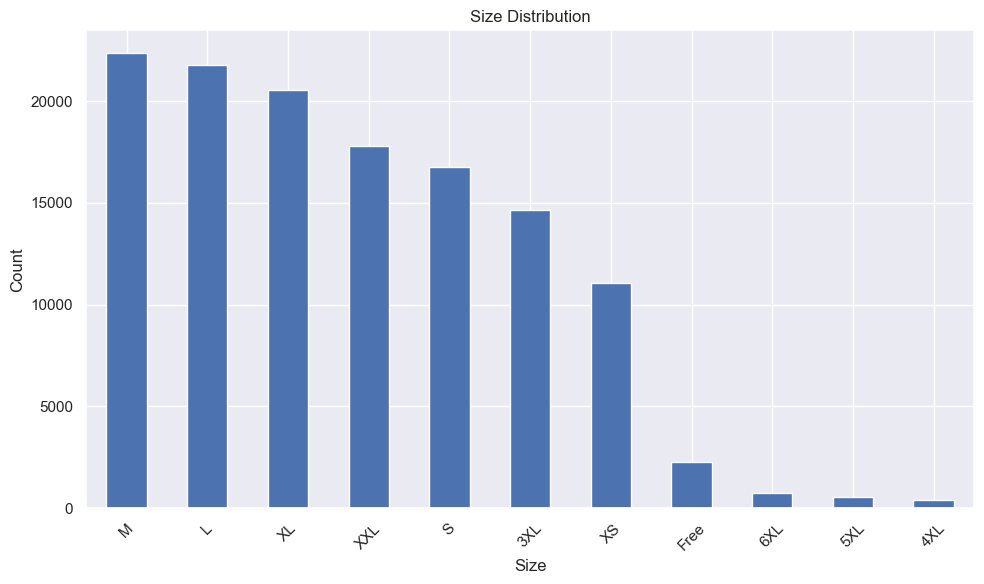

Top Selling Products:
Category
T-shirt     45281
Shirt       45029
Blazzer     13942
Trousers     9895
Perfume      1051
Wallet        863
Socks         399
Shoes         153
Watch           3
Name: Qty, dtype: int64


In [9]:
# Product category distribution
plt.figure(figsize=(10, 6))
df['Category'].value_counts().plot(kind='bar')
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Size distribution
plt.figure(figsize=(10, 6))
df['Size'].value_counts().plot(kind='bar')
plt.title('Size Distribution')
plt.xlabel('Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top selling products
top_products = df.groupby('Category')['Qty'].sum().sort_values(ascending=False)
print("Top Selling Products:")
print(top_products)

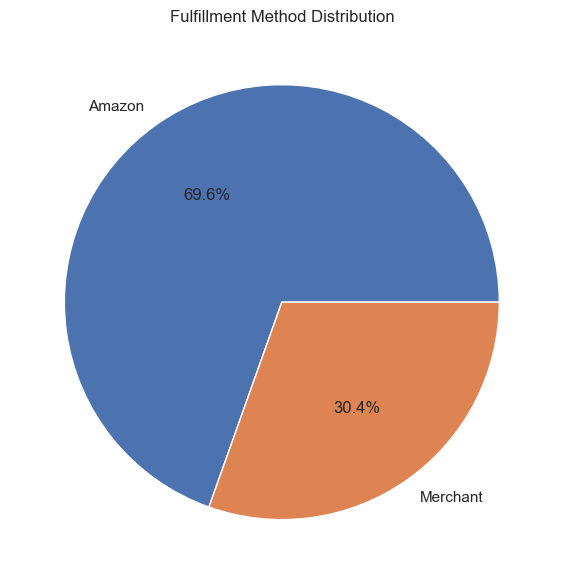

Fulfillment Effectiveness:
Status      Cancelled   Pending  Pending - Waiting for Pick Up    Shipped  \
Fulfilment                                                                  
Amazon      12.789466  0.462700                            NaN  86.738915   
Merchant    17.467516  0.619108                       0.715924        NaN   

Status      Shipped - Damaged  Shipped - Delivered to Buyer  \
Fulfilment                                                    
Amazon                    NaN                           NaN   
Merchant             0.002548                      73.24586   

Status      Shipped - Lost in Transit  Shipped - Out for Delivery  \
Fulfilment                                                          
Amazon                            NaN                         NaN   
Merchant                     0.012739                    0.089172   

Status      Shipped - Picked Up  Shipped - Rejected by Buyer  \
Fulfilment                                                     
Amazon

In [10]:
# Fulfillment method distribution
plt.figure(figsize=(8, 6))
df['Fulfilment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Fulfillment Method Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Analyze fulfillment effectiveness
fulfillment_status = df.groupby('Fulfilment')['Status'].value_counts().unstack()
fulfillment_status_pct = fulfillment_status.div(fulfillment_status.sum(axis=1), axis=0) * 100
print("Fulfillment Effectiveness:")
print(fulfillment_status_pct)

In [11]:
# Segment customers by order value
df['OrderValueSegment'] = pd.qcut(df['Amount'], q=3, labels=['Low', 'Medium', 'High'])

# Analyze customer segments
customer_segments = df.groupby('OrderValueSegment').agg({
    'Order ID': 'count',
    'Amount': 'mean',
    'ship-state': lambda x: x.mode().iloc[0]
}).rename(columns={'Order ID': 'OrderCount', 'Amount': 'AverageOrderValue'})

print("Customer Segments:")
print(customer_segments)

Customer Segments:
                   OrderCount  AverageOrderValue   ship-state
OrderValueSegment                                            
Low                     43674         297.719039  MAHARASHTRA
Medium                  42833         590.415880  MAHARASHTRA
High                    42434         949.207795  MAHARASHTRA


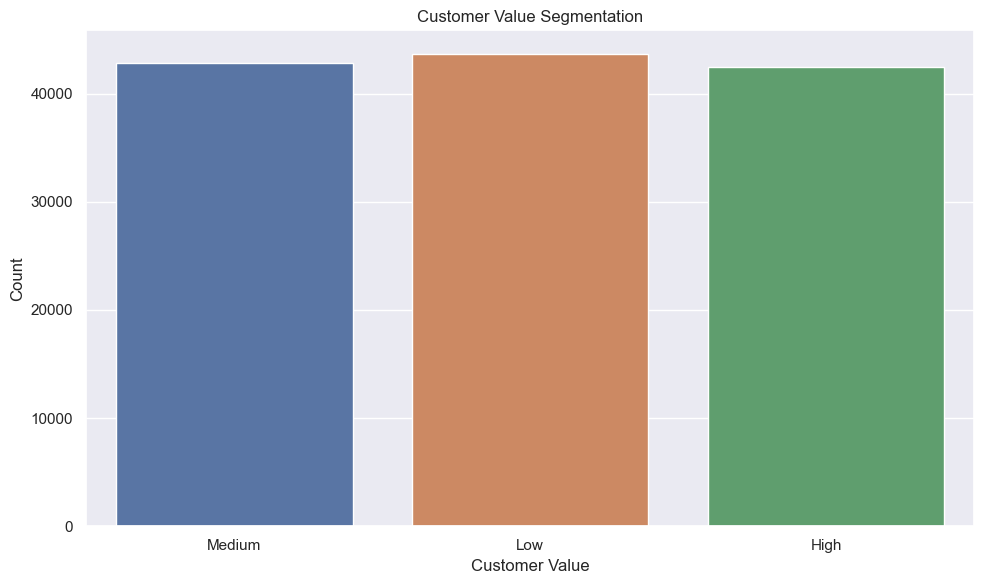

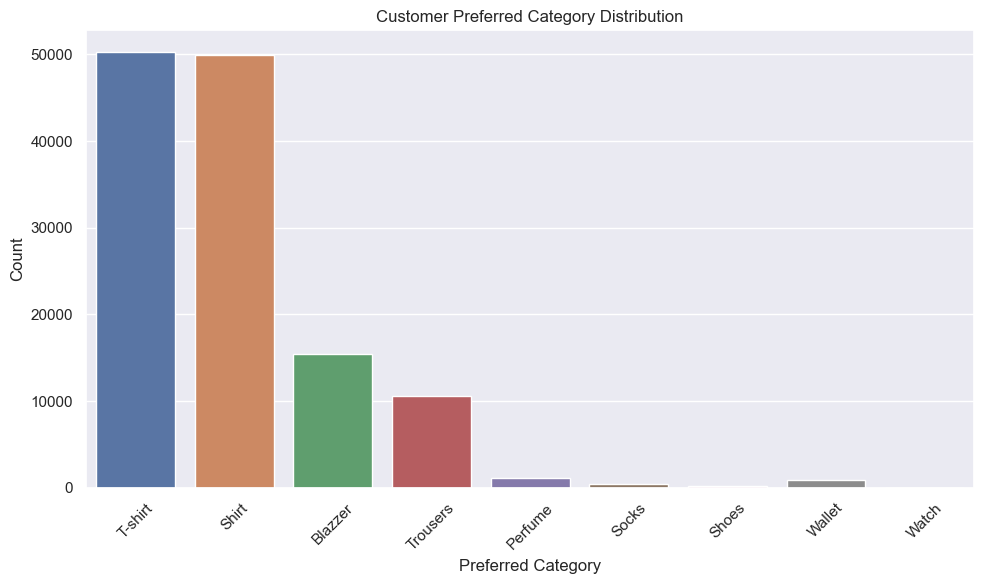

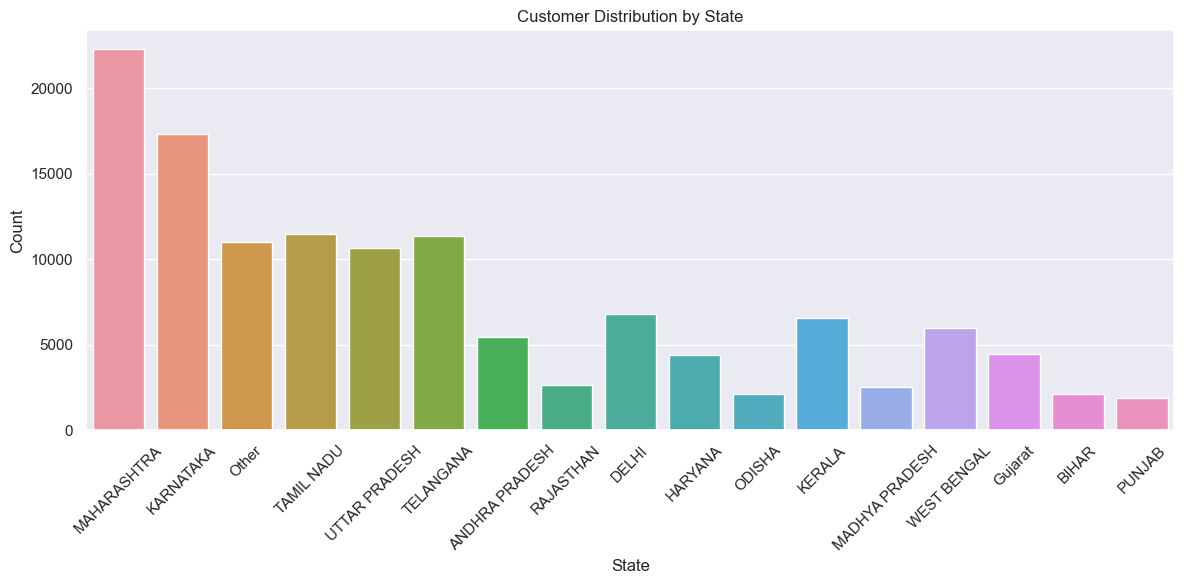

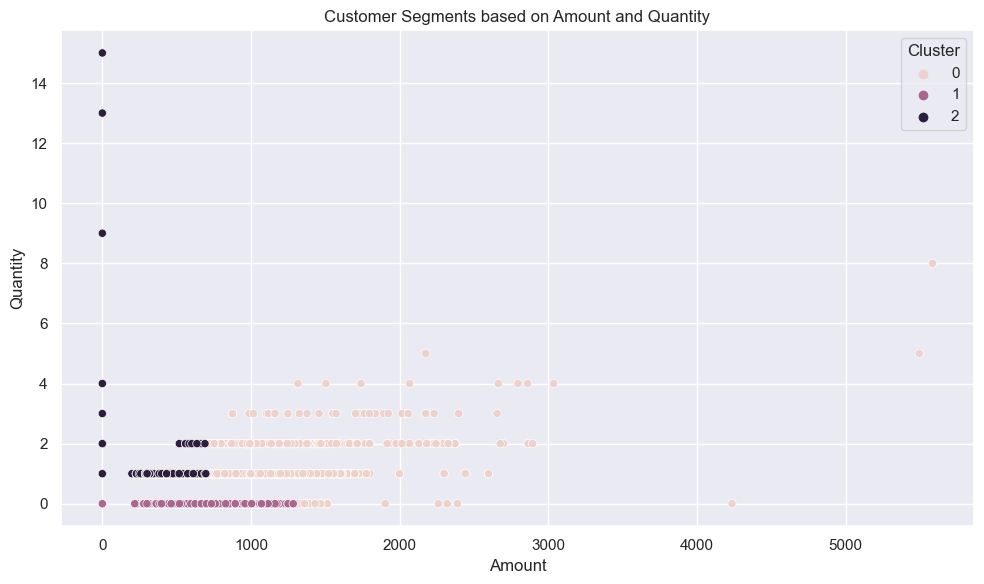

Cross-tabulation of Customer Value and Preferred Category:
PreferredCategory  Blazzer  Perfume  Shirt  Shoes  Socks  T-shirt  Trousers  \
CustomerValue                                                                 
High                 10434      655   3045    105      5    27120       992   
Low                   1360      349  32575     10    351     5240      3401   
Medium                3669      133  14347     51     84    17883      6204   

PreferredCategory  Wallet  Watch  
CustomerValue                     
High                   78      0  
Low                   386      2  
Medium                462      0  


In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# 1. Customer Value Segmentation
def value_segment(amount):
    if amount <= df['Amount'].quantile(0.33):
        return 'Low'
    elif amount <= df['Amount'].quantile(0.67):
        return 'Medium'
    else:
        return 'High'

df['CustomerValue'] = df['Amount'].apply(value_segment)

plt.figure(figsize=(10, 6))
sns.countplot(x='CustomerValue', data=df)
plt.title('Customer Value Segmentation')
plt.xlabel('Customer Value')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 2. Product Category Preference
category_preference = df.groupby('Order ID')['Category'].agg(lambda x: x.value_counts().index[0])
df['PreferredCategory'] = df['Order ID'].map(category_preference)

plt.figure(figsize=(10, 6))
sns.countplot(x='PreferredCategory', data=df)
plt.title('Customer Preferred Category Distribution')
plt.xlabel('Preferred Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Geographical Segmentation
state_counts = df['ship-state'].value_counts()
top_states = state_counts[state_counts > state_counts.mean()].index
df['StateSegment'] = df['ship-state'].apply(lambda x: x if x in top_states else 'Other')

plt.figure(figsize=(12, 6))
sns.countplot(x='StateSegment', data=df)
plt.title('Customer Distribution by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. K-means Clustering
features = ['Amount', 'Qty']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Amount', y='Qty', hue='Cluster', data=df)
plt.title('Customer Segments based on Amount and Quantity')
plt.xlabel('Amount')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()

# 5. Cross-tabulation of segments
cross_tab = pd.crosstab(df['CustomerValue'], df['PreferredCategory'])
print("Cross-tabulation of Customer Value and Preferred Category:")
print(cross_tab)

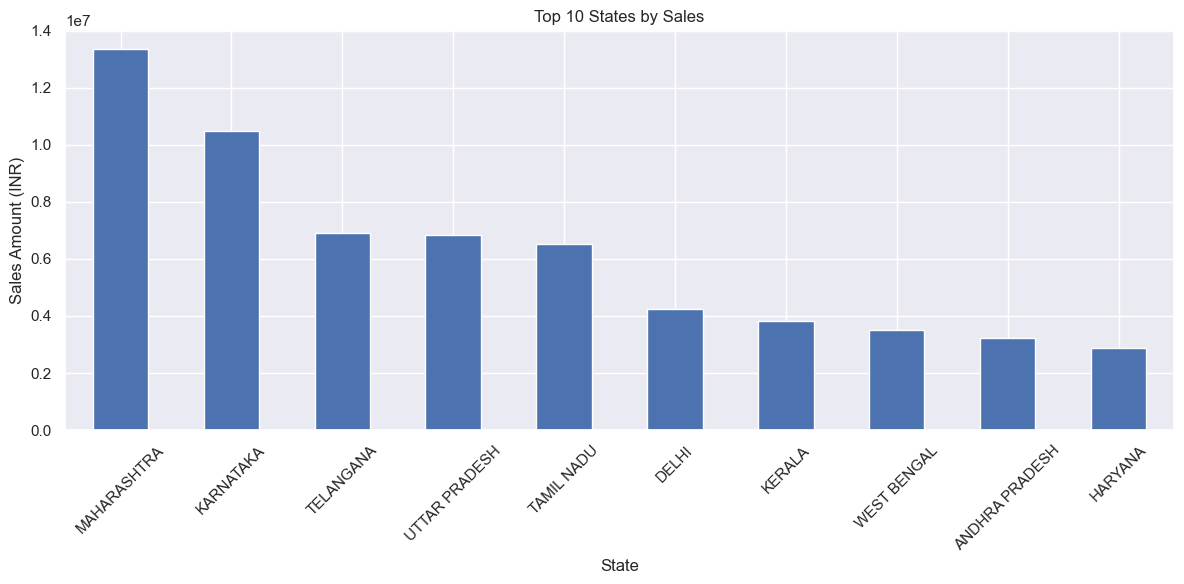

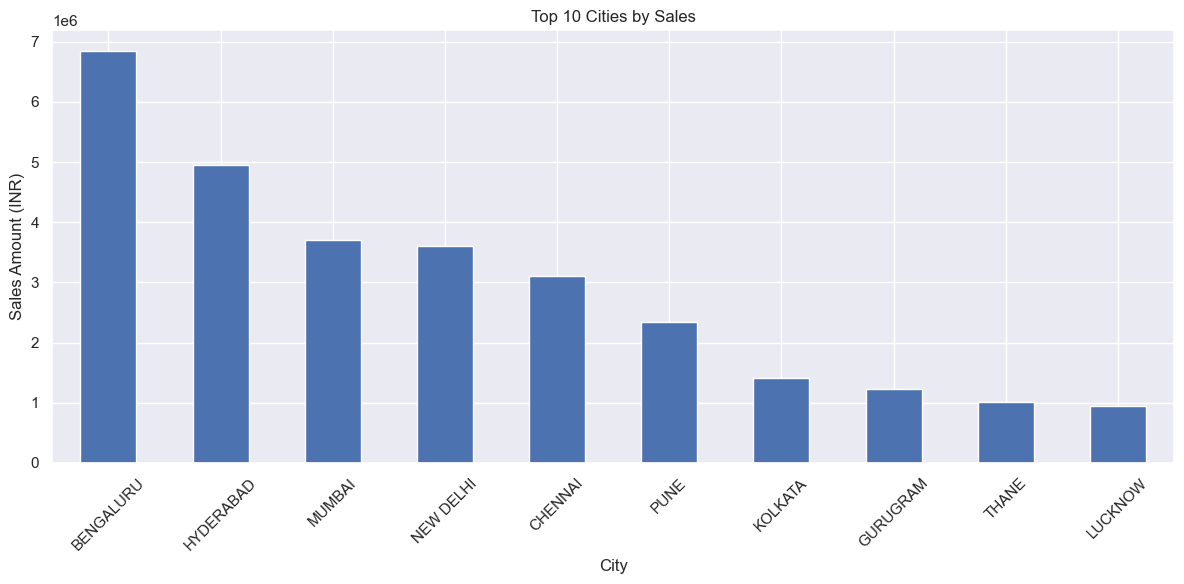

In [12]:
# Top 10 states by sales
top_states = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_states.plot(kind='bar')
plt.title('Top 10 States by Sales')
plt.xlabel('State')
plt.ylabel('Sales Amount (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 cities by sales
top_cities = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_cities.plot(kind='bar')
plt.title('Top 10 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Sales Amount (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()